In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import select as sel
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.decomposition import PCA  #principal components Analysis
from sklearn.impute import KNNImputer   # missing values imputation
from pandas.plotting import scatter_matrix  #scatter matrix correlation , scatter

from sklearn.cluster import KMeans  # clustering
from sklearn.metrics import silhouette_score #evaluation metric for # of clusters

from adjustText import adjust_text  #pip install adjustText

pd.set_option('display.max_columns', 100) #display more jupyter notebook
pd.set_option('display.max_rows', 100) 


%matplotlib inline 

from sklearn import preprocessing  # imputing and scale

from sklearn.impute import SimpleImputer
#for imputing missing values
# from sklearn.experimental import enable_iterative_imputer  
# from sklearn.impute import IterativeImputer

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score  #preditive accuracy
from sklearn.metrics import precision_score #precision
from sklearn.metrics import recall_score  #recall
from sklearn.metrics import auc  #area under curve
from sklearn.metrics import roc_auc_score  
from sklearn.metrics import log_loss  #log loss
from sklearn.metrics import f1_score  #f1 score

from sklearn.metrics import roc_curve #plot roc curve
from sklearn.metrics import precision_recall_curve  # plot precision recall

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge,RidgeCV, LassoCV, BayesianRidge,ElasticNet,ElasticNetCV

from sklearn import preprocessing  # imputing and scale

import itertools 

from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error   #RMSE

In [2]:
df=pd.read_csv("wine.csv")

In [3]:
df.shape




(6497, 13)

In [4]:
len(df)

6497

In [5]:
df.size

84461

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6491 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6494 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6482 non-null   float64
 10  alcohol               6487 non-null   float64
 11  Type                  6497 non-null   object 
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6491.000000,6497.000000,6494.000000,6497.000000,6482.000000,6487.000000,6497.000000
mean,7.214586,0.339632,0.318649,5.443508,0.056031,30.535805,115.738941,0.994596,3.218662,0.531403,10.494394,5.818378
std,1.296304,0.164620,0.145325,4.758042,0.035032,17.756039,56.518925,0.002998,0.160795,0.148912,1.193098,0.873255
min,3.799620,0.079992,0.000000,0.600030,0.009000,1.000050,5.999700,0.987011,2.720136,0.219978,8.000800,3.000000
25%,6.399360,0.229977,0.250013,1.800090,0.037998,17.000850,76.996150,0.992241,3.110156,0.429957,9.500950,5.000000
50%,6.999300,0.289971,0.310016,3.000150,0.046998,29.001450,117.994100,0.994786,3.210161,0.509949,10.301030,6.000000
75%,7.699230,0.399960,0.390020,8.100405,0.064997,41.002050,155.992200,0.996890,3.320166,0.599940,11.301130,6.000000
max,15.898410,1.579842,1.660083,65.803290,0.610969,289.014450,439.978000,1.038876,4.010201,1.999800,14.901490,9.000000


In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Type', 'quality'],
      dtype='object')

In [9]:
print('                     CLEANING UP COLUMN HEADERS                   ')

df.columns= [s.strip().replace(' ','_') for s in df.columns]
print(df.columns)

                     CLEANING UP COLUMN HEADERS                   
Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Type', 'quality'],
      dtype='object')


In [10]:
df.isnull().sum()

fixed_acidity            0
volatile_acidity         0
citric_acid              0
residual_sugar           0
chlorides                0
free_sulfur_dioxide      6
total_sulfur_dioxide     0
density                  3
pH                       0
sulphates               15
alcohol                 10
Type                     0
quality                  0
dtype: int64

In [11]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6491.000000,6497.000000,6494.000000,6497.000000,6482.000000,6487.000000,6497.000000
mean,7.214586,0.339632,0.318649,5.443508,0.056031,30.535805,115.738941,0.994596,3.218662,0.531403,10.494394,5.818378
std,1.296304,0.164620,0.145325,4.758042,0.035032,17.756039,56.518925,0.002998,0.160795,0.148912,1.193098,0.873255
min,3.799620,0.079992,0.000000,0.600030,0.009000,1.000050,5.999700,0.987011,2.720136,0.219978,8.000800,3.000000
25%,6.399360,0.229977,0.250013,1.800090,0.037998,17.000850,76.996150,0.992241,3.110156,0.429957,9.500950,5.000000
50%,6.999300,0.289971,0.310016,3.000150,0.046998,29.001450,117.994100,0.994786,3.210161,0.509949,10.301030,6.000000
75%,7.699230,0.399960,0.390020,8.100405,0.064997,41.002050,155.992200,0.996890,3.320166,0.599940,11.301130,6.000000
max,15.898410,1.579842,1.660083,65.803290,0.610969,289.014450,439.978000,1.038876,4.010201,1.999800,14.901490,9.000000


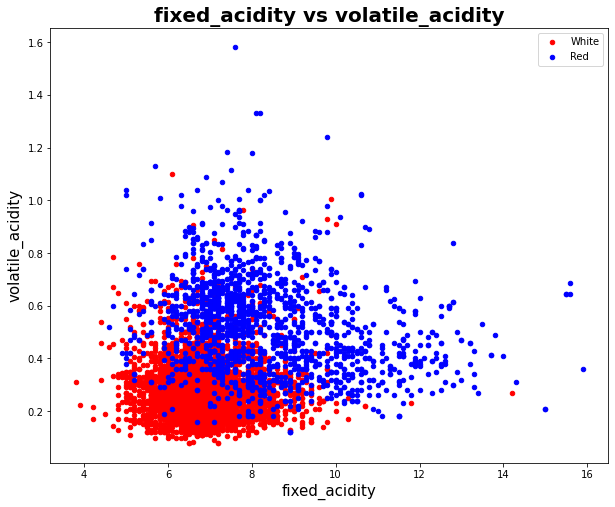

In [12]:
plot, ax = plt.subplots()
colors={'White':'blue','Red':'red'}
split=df.groupby('Type')

for x3,y3 in split:
    y3.plot(ax=ax,kind='scatter',x='fixed_acidity',y='volatile_acidity',grid=False,label=x3,color=colors[x3],figsize=(10,8))

ax.set_xlabel('fixed_acidity',size=15)
ax.set_ylabel('volatile_acidity',size=15)
ax.set_title('fixed_acidity vs volatile_acidity',size=20,fontweight='bold')
ax.legend(["White", "Red"])
plt.show()

In [13]:
df.sample(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Type,quality
4568,8.39916,0.189981,0.430022,2.100105,0.051997,20.001000,103.994800,0.993901,2.850143,0.459954,9.50095,Red,5
2172,7.89921,0.169983,0.320016,1.600080,0.052997,47.002350,149.992500,0.994701,3.290165,0.759924,9.60096,Red,6
2704,6.79932,0.219978,0.300015,10.600530,0.069997,67.003350,193.990300,0.996440,2.890145,0.419958,9.00090,Red,6
4351,6.99930,0.199980,0.340017,5.700285,0.034998,32.001600,82.995850,0.992701,3.190160,0.459954,11.50115,Red,6
2879,7.29927,0.239976,0.300015,2.500125,0.041998,31.001550,103.994800,0.991001,3.050153,0.559944,11.30113,Red,7
342,7.29927,0.259974,0.530027,12.700635,0.046998,60.503025,155.992200,0.998300,3.060153,0.449955,9.10091,Red,6
3562,7.39926,0.129987,0.390020,4.700235,0.041998,36.001800,136.993150,0.994901,3.360168,0.559944,10.30103,Red,7
4068,7.59924,0.199980,0.300015,14.200710,0.055997,53.002650,212.489375,0.998900,3.140157,0.459954,8.90089,Red,8
5289,6.19938,0.219978,0.280014,2.200110,0.039998,24.001200,124.993750,0.991601,3.190160,0.479952,10.50105,Red,6
2593,6.89931,0.239976,0.390020,1.300065,0.062997,18.000900,135.993200,0.992701,3.310166,0.479952,10.40104,Red,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6491 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6494 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6482 non-null   float64
 10  alcohol               6487 non-null   float64
 11  Type                  6497 non-null   object 
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
      fixed_acidity  volatile_acidity  citric_acid  residual_su

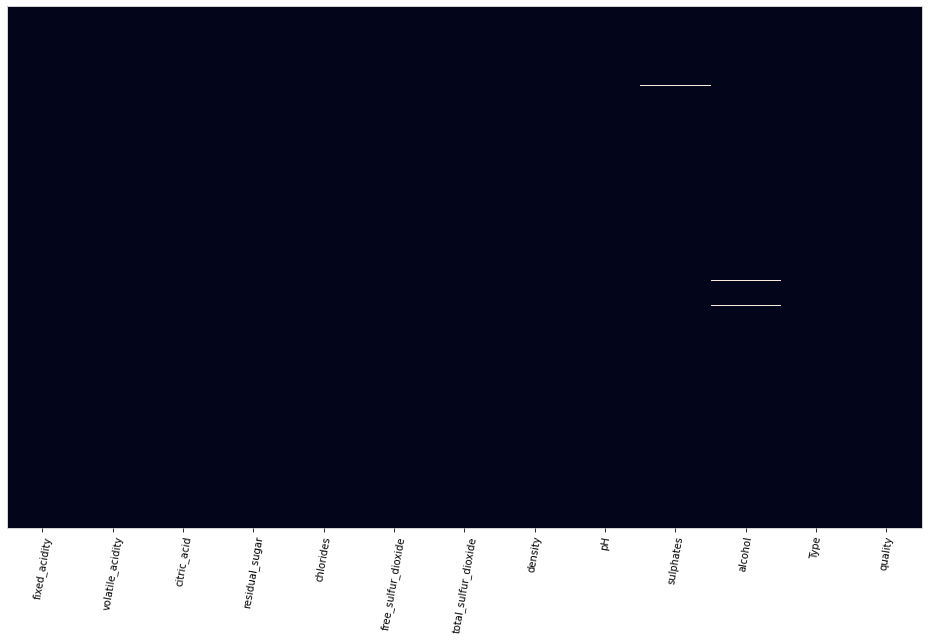

Number of rows with valid free_sulfur_dioxide values after filling NA values:  6497
Number of rows with valid density values after filling NA values:  6497
Number of rows with valid sulphates values after filling NA values:  6497
Number of rows with valid alcohol values after filling NA values:  6497


In [14]:
 #Exploring the data for missing values and using a heatmap. 
# #Replacing the missing value(s) with an imputed value(s) and creating an indicator variable as such. 

import matplotlib.pyplot as plt
import seaborn as sns
df.info()
#Given a dataframe df create a copy of the array that is 0 if a field contains a value 
#and 1 for NaN
naInfo = np.zeros(df.shape)
naInfo[df.isnull().values] = 1
naInfo = pd.DataFrame(naInfo, columns=df.columns)

fig, ax = plt.subplots()
fig.set_size_inches(13, 9)
print("======")
print(naInfo)
print("======")
ax = sns.heatmap(naInfo, vmin=0, vmax=1, cbar=False, ax=ax)
ax.set_yticks([])

rect = plt.Rectangle((0, 0), naInfo.shape[1], naInfo.shape[0], linewidth=1, 
                      edgecolor='lightgrey',facecolor='none')
rect = ax.add_patch(rect)
rect.set_clip_on(False)

plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

# # df1['free_sulfur_dioxide_miss']
df['free_sulfur_dioxide_miss']=np.where(df['free_sulfur_dioxide'].isnull()==True,1,0)
mediansd = df['free_sulfur_dioxide'].median()
df.free_sulfur_dioxide = df.free_sulfur_dioxide.fillna(value=mediansd)
print('Number of rows with valid free_sulfur_dioxide values after filling NA values: ',df['free_sulfur_dioxide'].count())

# # data2['density_miss']
df['density_miss']=np.where(df['density'].isnull()==True,1,0)
mediandensity = df['density'].median()
df.density = df.density.fillna(value=mediandensity)
print('Number of rows with valid density values after filling NA values: ',df['density'].count())

# # data2['sulphates_miss']
df['sulphates_miss']=np.where(df['sulphates'].isnull()==True,1,0)
mediansulphates = df['sulphates'].median()
df.sulphates = df.sulphates.fillna(value=mediansulphates)
print('Number of rows with valid sulphates values after filling NA values: ',df['sulphates'].count())

# # data2['alcohol_miss']
df['alcohol_miss']=np.where(df['alcohol'].isnull()==True,1,0)
medianalcohol = df['alcohol'].median()
df.alcohol = df.alcohol.fillna(value=medianalcohol)
print('Number of rows with valid alcohol values after filling NA values: ',df['alcohol'].count())



In [15]:
for x in ['Type']:
    print('-'*50)
    print(x)
    print(df[x].value_counts(dropna=False))  #value counts by object/categorical variable
    print('-'*50)

--------------------------------------------------
Type
Red      4898
White    1599
Name: Type, dtype: int64
--------------------------------------------------


In [16]:
df=pd.concat([df,df['Type'].str.get_dummies(sep=' ')],axis=1)  # dummies with the original df
#leave 1 out rule
df=df.drop(['Type',],axis=1)  #drop mfr, drop type dummies, drop C leave 1 out.
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,free_sulfur_dioxide_miss,density_miss,sulphates_miss,alcohol_miss,Red,White
0,7.39926,0.964904,0.000000,2.200110,0.087996,16.000800,31.99840,0.99746,3.580179,0.669933,10.20102,5,0,0,0,0,0,1
1,12.29877,0.389961,0.630032,2.300115,0.090995,6.000300,17.99910,1.00030,3.160158,0.489951,9.50095,5,0,0,0,0,0,1
2,6.39936,0.269973,0.490025,7.300365,0.045998,53.002650,205.98970,0.99550,3.240162,0.429957,9.20092,6,0,0,0,0,1,0
3,7.39926,0.189981,0.300015,12.800640,0.052997,48.502425,228.98855,0.99850,3.140157,0.489951,9.10091,7,0,0,0,0,1,0
4,6.19938,0.339966,0.300015,11.100555,0.046998,28.001400,236.98815,0.99800,3.180159,0.489951,8.70087,5,0,0,0,0,1,0


In [17]:
imputer = KNNImputer(n_neighbors=2)
df.iloc[:,1:]=imputer.fit_transform(df.iloc[:,1:])

In [21]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,free sulfur dioxide_miss,density_miss,sulphates_miss,alcohol_miss,Red,White
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282669,-0.329056,0.458807,-0.252700,0.299099,-0.095636,-0.076743,-0.012086,0.017984,-0.014669,-0.006218,-0.486740,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352448,-0.414472,0.271174,0.261454,0.226981,-0.037723,-0.265699,-0.013174,0.036383,0.004189,0.001391,-0.653036,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133484,0.195236,0.096174,-0.329808,0.054461,-0.010525,0.085532,0.022256,-0.019520,-0.032212,0.013880,0.187396,-0.187396
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402793,0.495482,0.552641,-0.267320,-0.186671,-0.359486,-0.036980,-0.016146,-0.012996,-0.002965,0.019945,0.348821,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.194863,-0.279628,0.362556,0.044708,0.396462,-0.256665,-0.200666,-0.016953,0.014705,0.014876,0.033922,-0.512678,0.512678
free sulfur dioxide,-0.282669,-0.352448,0.133484,0.402793,-0.194863,1.000000,0.721020,0.025738,-0.145931,-0.188333,-0.179342,0.055315,-0.016886,-0.015974,0.001648,0.033787,0.471561,-0.471561
total sulfur dioxide,-0.329056,-0.414472,0.195236,0.495482,-0.279628,0.721020,1.000000,0.032388,-0.238414,-0.276394,-0.265904,-0.041388,-0.018063,-0.017143,-0.004209,0.024005,0.700354,-0.700354
density,0.458807,0.271174,0.096174,0.552641,0.362556,0.025738,0.032388,1.000000,0.011621,0.259431,-0.686626,-0.305719,-0.042823,0.014388,0.007957,0.025243,-0.390424,0.390424
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145931,-0.238414,0.011621,1.000000,0.191874,0.121052,0.019506,0.000914,0.017580,-0.005536,-0.013065,-0.329129,0.329129
sulphates,0.299099,0.226981,0.054461,-0.186671,0.396462,-0.188333,-0.276394,0.259431,0.191874,1.000000,-0.004056,0.037645,-0.005745,-0.000210,-0.000685,0.041572,-0.488413,0.488413


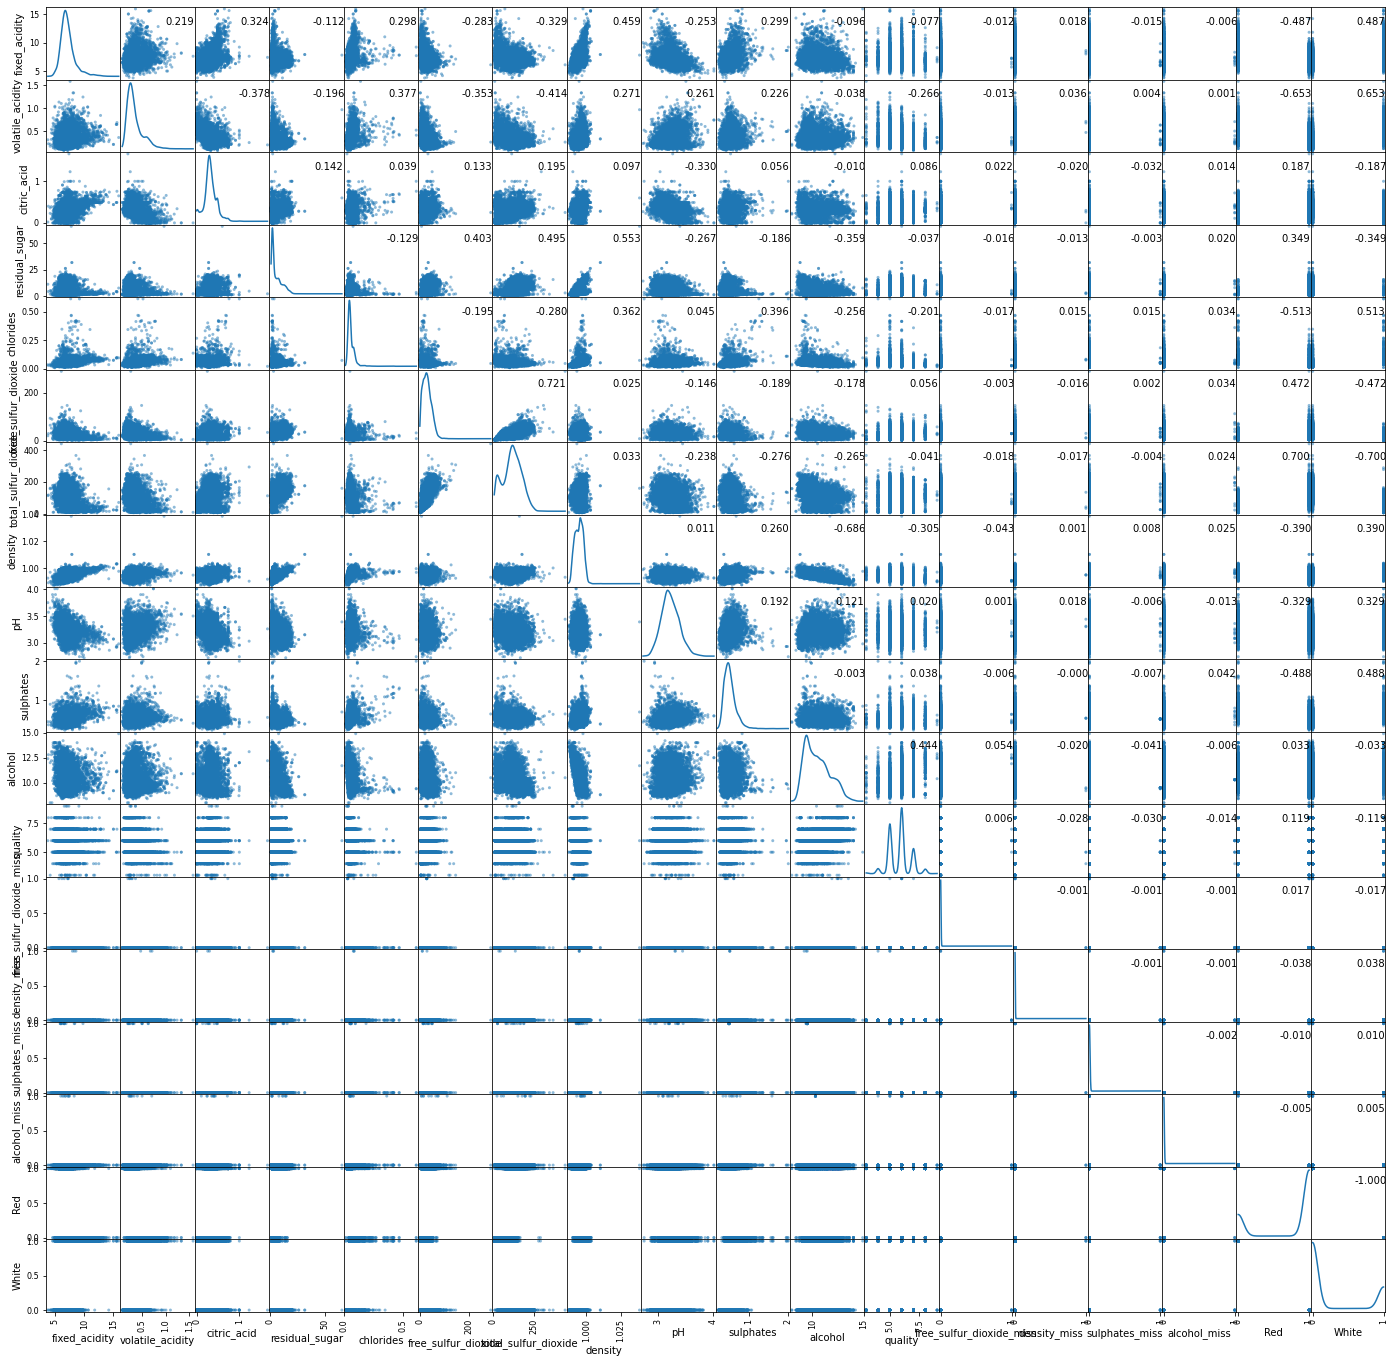

In [18]:
from pandas.plotting import scatter_matrix

axes = scatter_matrix(df, alpha=0.5, diagonal='kde',figsize=(24, 24))
corr = df.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

In [19]:
df.shape

(6497, 18)

In [20]:
scaler = preprocessing.MinMaxScaler()

In [21]:
pcs = PCA(whiten=True)
scores = pd.DataFrame(pcs.fit_transform(scaler.fit_transform(df.iloc[:,1:])),
                      columns=['PC{}'.format(i) for i in range(1, len(df.iloc[:,1:].columns) + 1)]) 
scores.head(100)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,1.848666,-0.313054,2.277911,1.188863,-0.842024,1.562638,1.548002,1.571548,-0.368223,-0.013940,-0.216354,0.254523,1.156048,-0.067331,-0.204078,0.808239,-38.418934
1,1.729100,-0.825771,-0.837013,-1.391761,0.112664,-1.795353,-1.622319,1.426653,-0.860795,-0.018719,-0.188635,0.096095,0.000273,-0.058023,-0.297077,2.256155,3.550903
2,-0.614918,-0.897718,-0.748984,1.023943,0.773556,0.118779,-0.792476,0.201830,-1.603672,-0.045721,-0.456652,0.025778,-0.023633,0.046841,0.011004,-0.656568,10.474683
3,-0.645222,-0.746768,-1.968269,1.597188,0.013474,1.170723,-0.486812,-0.720460,0.163290,-0.105477,0.061064,-0.429726,-1.567412,0.237825,-0.055791,0.611414,-7.695383
4,-0.605288,-1.742368,0.018265,0.607409,0.679319,0.933915,-0.081478,-0.232591,-0.103325,-0.170456,-0.882330,-0.574273,-2.646069,0.270806,-0.036455,-0.352601,-16.545486
5,-0.516960,1.565559,2.905453,-1.252966,0.652631,2.155213,-0.178560,-0.155947,-0.179393,0.050863,0.057964,0.709525,3.623791,-0.437633,-0.010996,-0.214266,2.962613
6,-0.566893,2.440293,-1.060742,-1.157116,-1.690979,1.719643,0.080799,0.361109,-1.056528,0.048707,0.120958,0.189081,0.528481,-0.139200,0.002706,0.428003,56.177380
7,-0.600715,-1.115299,0.333796,0.206368,0.371032,0.548550,-0.372729,-1.746493,0.745517,-0.186187,0.200107,-0.037977,0.532651,0.013516,-0.054477,0.208027,1.175498
8,-0.571847,-0.887230,0.716235,0.091715,0.407681,0.880619,1.097567,-1.358425,0.388683,-0.220430,-0.962696,-0.236754,-0.850557,0.102938,0.012938,-0.623527,2.701527
9,-0.602724,1.048352,-1.264845,-1.067646,-1.036120,0.744847,-0.328896,-1.055562,0.188213,-0.088316,0.037150,0.198495,1.010164,-0.105909,0.065619,-0.376598,8.428627


In [22]:
scores.corr().round()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
PC1,1.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0
PC2,0.0,1.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0
PC3,0.0,-0.0,1.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0
PC4,-0.0,-0.0,0.0,1.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0
PC5,0.0,0.0,-0.0,-0.0,1.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0
PC6,0.0,0.0,0.0,-0.0,-0.0,1.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0
PC7,-0.0,-0.0,-0.0,0.0,0.0,0.0,1.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0
PC8,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PC9,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,1.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0
PC10,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,1.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0


In [23]:
pcsSummary = pd.DataFrame({'Explained Variance': pcs.explained_variance_, #explained variance
                           'Explained Variance Ratio': pcs.explained_variance_ratio_,  #explained variance %
                           'Cumulative Proportion': np.cumsum(pcs.explained_variance_ratio_)}) #cumulative %
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = scores.columns
pcsSummary

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
Explained Variance,0.391870,0.041807,0.016723,0.014014,0.008311,0.008003,0.004902,0.004274,0.003670,0.002293,0.001959,0.001528,0.001437,0.000917,0.000463,0.000269,1.013602e-32
Explained Variance Ratio,0.779939,0.083208,0.033284,0.027892,0.016541,0.015928,0.009757,0.008506,0.007304,0.004563,0.003898,0.003040,0.002859,0.001824,0.000921,0.000535,2.017373e-32
Cumulative Proportion,0.779939,0.863147,0.896431,0.924323,0.940864,0.956792,0.966548,0.975055,0.982359,0.986922,0.990820,0.993861,0.996720,0.998544,0.999465,1.000000,1.000000e+00


In [24]:
pcsSummary.to_csv('explained variance.csv',)

Text(0.5, 1.0, 'Explained Variance by Component')

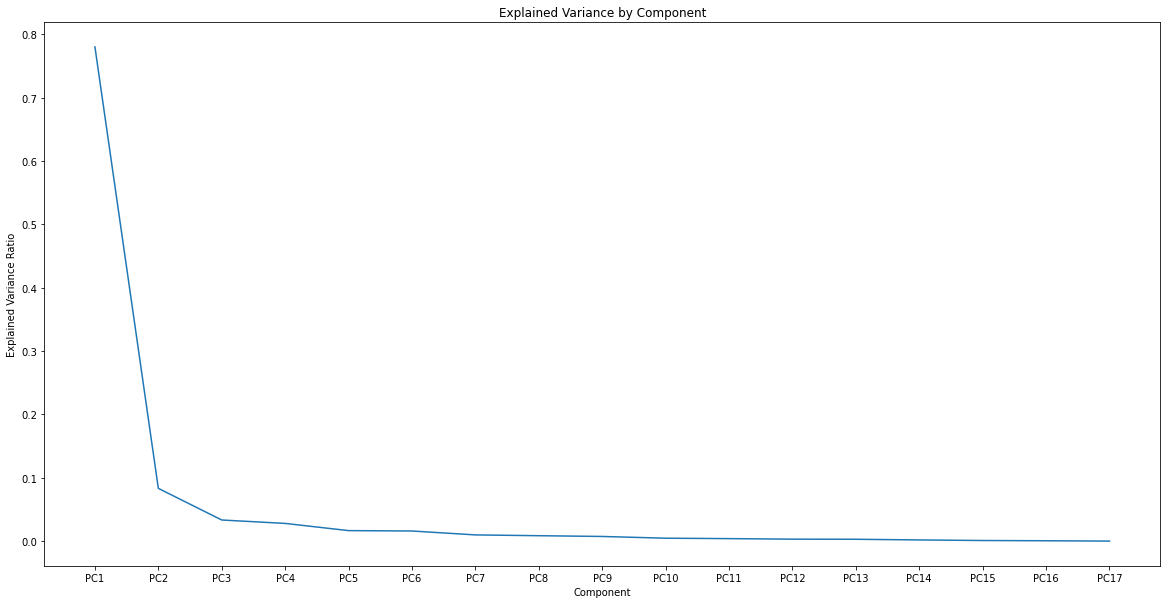

In [25]:
plt.figure(figsize=(20,10))
plt.plot(pcsSummary[1:2].transpose())
plt.xlabel('Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Component')

In [30]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary.columns, 
                                index=df.iloc[:,1:].columns)
pcsComponents_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
volatile acidity,0.116686,-0.053759,0.283340,-0.025740,-0.130916,0.612848,0.343343,0.499248,-0.323000,0.021238,-0.132195,0.047037,0.134236,-0.002739,-0.001412,-0.014119,-1.654666e-16
citric acid,-0.028036,-0.012889,-0.332541,-0.205785,0.486109,-0.365451,-0.121743,0.544479,-0.365493,0.038336,-0.121665,0.036031,0.083841,-0.011603,0.004265,-0.081510,-3.563026e-17
residual sugar,-0.041952,-0.146499,-0.166738,0.077763,0.066370,0.248453,-0.197043,0.402067,0.677807,0.030969,0.132510,-0.007153,-0.003821,-0.001600,0.022418,-0.444748,-4.019126e-16
chlorides,0.047845,-0.074107,-0.053410,-0.034952,0.054578,-0.029313,0.257491,0.065885,-0.163654,0.045374,0.924489,-0.111659,-0.132834,-0.000667,0.004315,0.003411,-2.621837e-16
free sulfur dioxide,-0.048001,-0.066915,-0.088942,0.137627,0.248645,0.198899,-0.137679,-0.237499,-0.030229,0.013804,0.183650,0.208879,0.839712,-0.005698,-0.000580,0.077514,4.790049e-16
total sulfur dioxide,-0.148725,-0.220387,-0.119655,0.249549,0.560907,0.461510,-0.099068,-0.290951,-0.200648,-0.011527,-0.085652,-0.119293,-0.409396,0.014407,-0.002922,-0.029378,-3.983567e-16
density,0.035250,-0.193592,-0.130226,0.086892,0.054244,0.051260,-0.044773,0.268410,0.294608,0.003351,0.006295,-0.027890,-0.065708,-0.005118,-0.034588,0.874065,7.587553e-16
pH,0.068226,0.114150,0.476720,0.766189,0.157620,-0.294809,-0.079649,0.213266,-0.030904,0.015961,0.044690,0.003650,-0.000555,-0.002984,0.000683,-0.034556,-5.189066e-17
sulphates,0.065546,0.012600,-0.127412,0.082265,0.319299,-0.160228,0.834241,-0.108914,0.302181,-0.013114,-0.188426,0.003351,0.083695,-0.001933,0.008033,-0.054993,1.451315e-16
alcohol,-0.007706,0.792208,0.239168,-0.273569,0.365927,0.191416,-0.080812,0.017073,0.185232,0.017282,0.094804,-0.021647,-0.050062,-0.010572,-0.002913,0.127471,5.157215e-17


<AxesSubplot:>

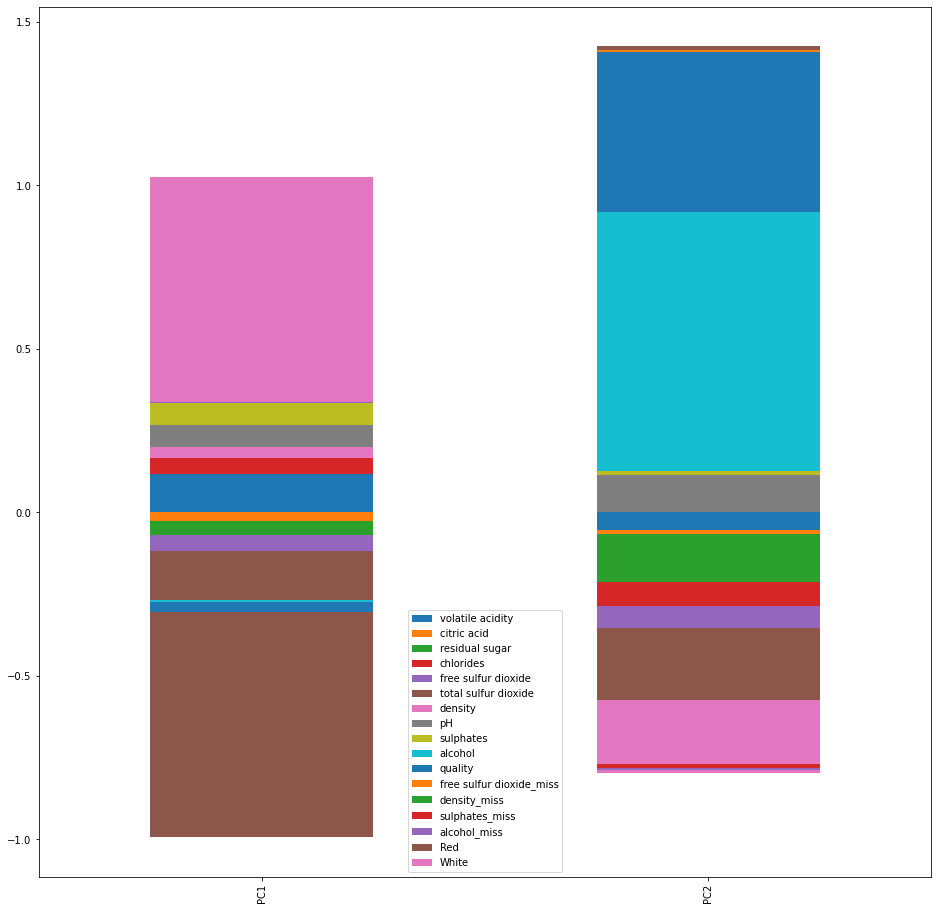

In [31]:
pcsComponents_df[['PC1','PC2',]].transpose().plot(kind='bar', stacked=True,figsize=(16, 16))

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

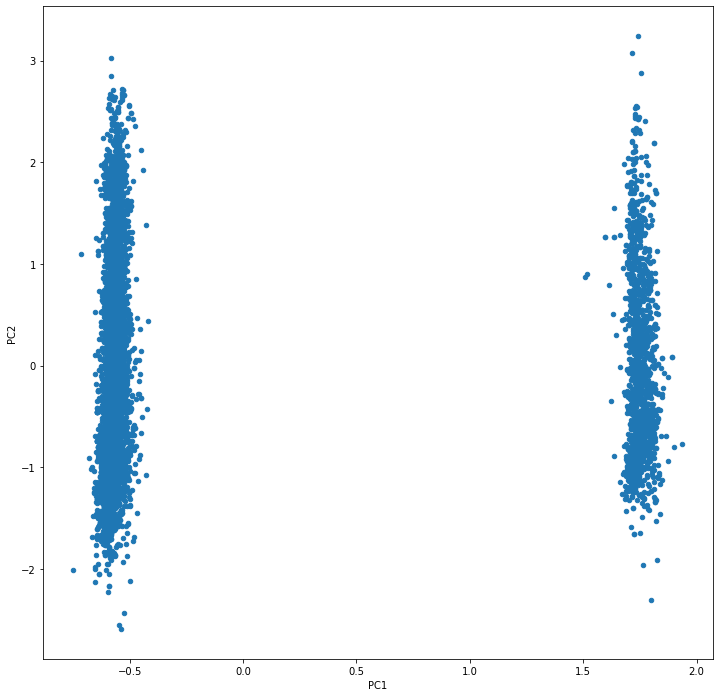

In [32]:
scores.plot.scatter(x='PC1', y='PC2',figsize=(12, 12))

<AxesSubplot:xlabel='PC3', ylabel='PC4'>

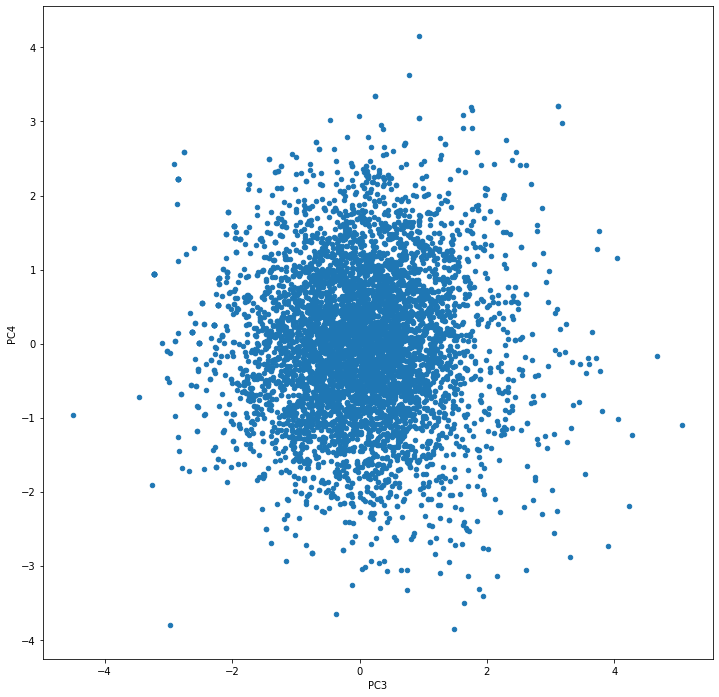

In [33]:
scores.plot.scatter(x='PC3', y='PC4',figsize=(12, 12))

<AxesSubplot:xlabel='PC5', ylabel='PC6'>

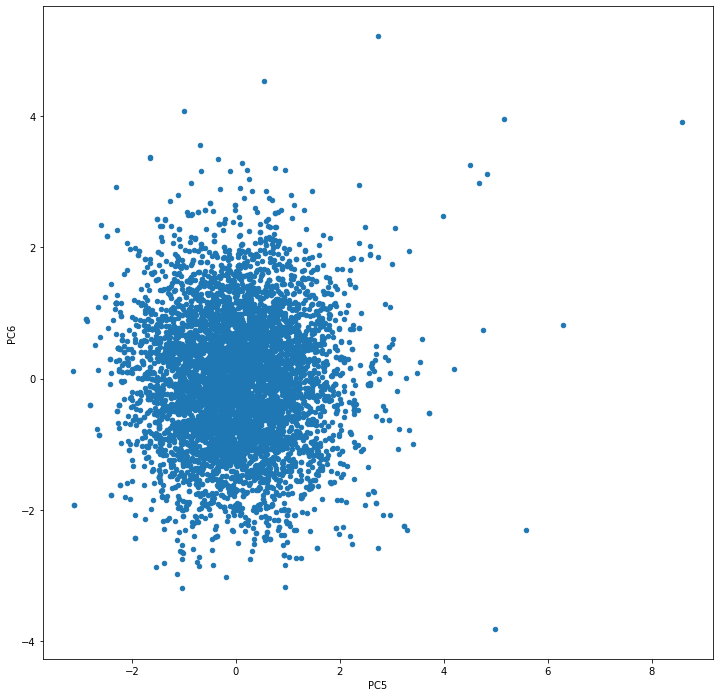

In [34]:
scores.plot.scatter(x='PC5', y='PC6',figsize=(12, 12))

In [27]:
scores['name']=df.index 

In [ ]:
ax = scores.plot.scatter(x='PC1', y='PC2', figsize=(16, 16)) #scatter PC1 and PC2
points = scores[['PC1','PC2','name']] 
texts = [] #adjust text
for _, (x, y, s) in points.iterrows(): #adjust text
        texts.append(ax.text(x, y, s)) #adjust text
adjust_text(texts, force_text=0.05, arrowprops=dict(arrowstyle="-|>", color='r', alpha=0.5))  #adjust text

In [26]:
cols=['PC1', 'PC2', 'PC3',] 

silhouette=[] 
inertia=[]
clusters=[]
for i in range(2,40):  #2=2 clusters, use enough to where we see declining silhouette and/or flattening of inertia
    kmeans = KMeans(n_clusters=i, random_state=0).fit(scores[cols])
    silhouette.append(silhouette_score(scores[cols],kmeans.labels_)) #silhouette
    inertia.append(kmeans.inertia_)
    clusters.append(i)

In [37]:
kmeans_eval=pd.DataFrame({'silhouette_score': silhouette,'inertia': inertia,},index=clusters)

Text(0.5, 1.0, 'Scree Plot Inertia')

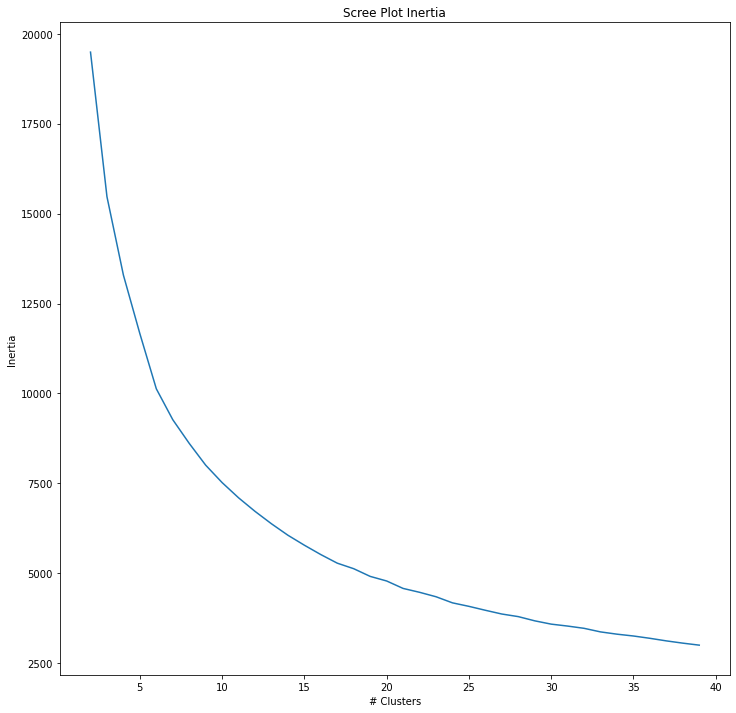

In [38]:
kmeans_eval['inertia'].plot(figsize=(12, 12))#use elbow method of finding # of components to cluster
plt.xlabel('# Clusters')
plt.ylabel('Inertia')
plt.title('Scree Plot Inertia')

Text(0.5, 1.0, 'Silhouette score by # of clusters')

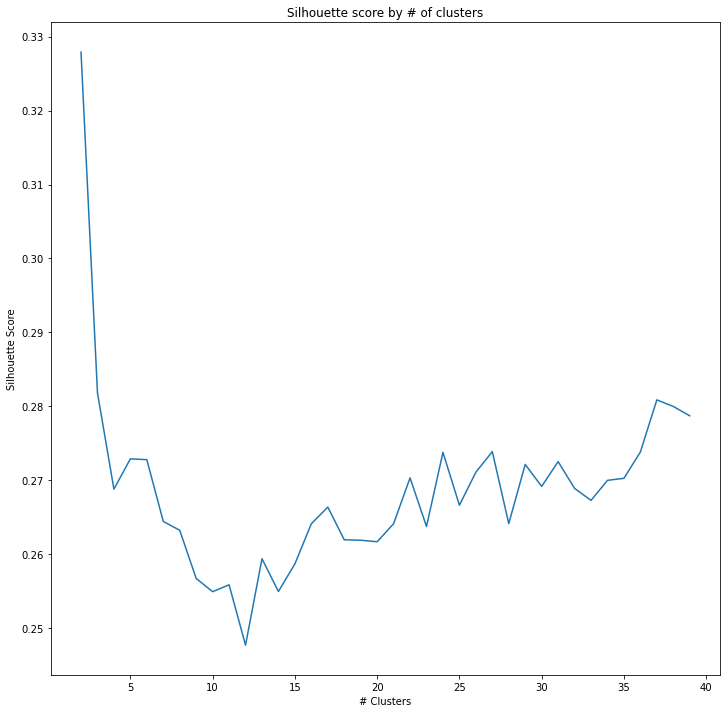

In [39]:
kmeans_eval['silhouette_score'].plot(figsize=(12, 12)) #plot silhouete_score, visually look for highest value and corresponding cluster
plt.xlabel('# Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette score by # of clusters')

In [ ]:
kmeans= KMeans(n_clusters=5).fit(scores[cols]) 
scores['cluster']=kmeans.labels_  

groups = scores.groupby('cluster') 

df['cluster']=scores['cluster']  

ax = scores.plot.scatter(x='PC1', y='PC2', figsize=(16, 16))
points = scores[['PC1','PC2','name']]

texts = [] #adjust text
for _, (x, y, s) in points.iterrows():
        texts.append(ax.text(x, y, s))
adjust_text(texts, force_text=0.05, arrowprops=dict(arrowstyle="-|>", color='r', alpha=0.5))


for name, group in groups:  
    ax.plot(group.PC1, group.PC2, marker='o', linestyle='', ms=12, label=name) 
ax.legend()

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression

In [41]:
predictors = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
              'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
              'pH', 'sulphates', 'alcohol', 'quality', 'free sulfur dioxide_miss',
              'density_miss', 'sulphates_miss', 'alcohol_miss']
target = ['Red']
X = df[predictors]
y = df[target]

In [42]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# train neural network with 2 hidden nodes
model = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic',solver='lbfgs',
                    random_state=1,)
model.fit(train_X, train_y.values)

C:\Users\Nihal Jayan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), random_state=1,
              solver='lbfgs')

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       643
         1.0       0.75      1.00      0.86      1956

    accuracy                           0.75      2599
   macro avg       0.38      0.50      0.43      2599
weighted avg       0.57      0.75      0.65      2599



C:\Users\Nihal Jayan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nihal Jayan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nihal Jayan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


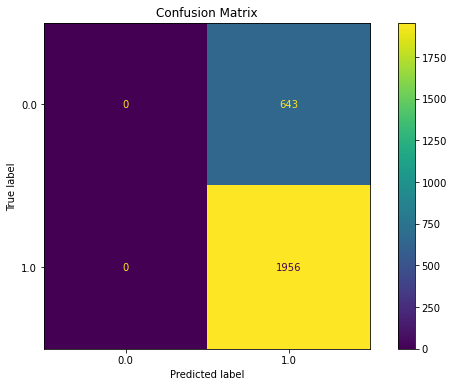

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')
disp =plot_confusion_matrix(model, valid_X, valid_y, ax = ax)
disp.confusion_matrix

print(classification_report(valid_y, model.predict(valid_X)))

In [44]:
predictors = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
              'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
              'pH', 'sulphates', 'alcohol', 'quality', 'free sulfur dioxide_miss',
              'density_miss', 'sulphates_miss', 'alcohol_miss']
target = ['White']
X = df[predictors]
y = df[target]

In [45]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# train neural network with 2 hidden nodes
model = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic',solver='lbfgs',
                    random_state=1,)
model.fit(train_X, train_y.values)


C:\Users\Nihal Jayan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Nihal Jayan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), random_state=1,
              solver='lbfgs')

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      1956
         1.0       0.92      0.95      0.94       643

    accuracy                           0.97      2599
   macro avg       0.95      0.96      0.96      2599
weighted avg       0.97      0.97      0.97      2599



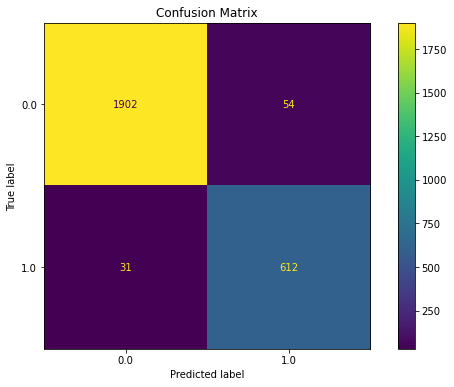

In [46]:
ig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')
disp =plot_confusion_matrix(model, valid_X, valid_y, ax = ax)
disp.confusion_matrix

print(classification_report(valid_y, model.predict(valid_X)))

In [47]:
predictors = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
              'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
              'pH', 'sulphates', 'alcohol', 'quality', 'free sulfur dioxide_miss',
              'density_miss', 'sulphates_miss', 'alcohol_miss']
target = ['White']
X = df[predictors]
y = df[target]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.40, random_state=3)

DecisionTreeClassifier(max_depth=9, max_features=11, min_samples_split=7,
                       random_state=1)
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1955
         1.0       0.99      0.96      0.97       644

    accuracy                           0.99      2599
   macro avg       0.99      0.98      0.98      2599
weighted avg       0.99      0.99      0.99      2599



C:\Users\Nihal Jayan\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.91482966 0.91482966 ... 0.97716895 0.97716895 0.97716895]
  warnings.warn(


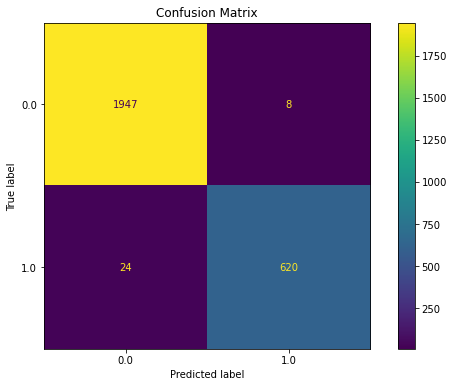

In [48]:

clf = DecisionTreeClassifier(random_state=1)

param_grid = {
    'max_depth': list(np.arange(1,12)),    
    'min_samples_split': list(np.arange(1,12)), 
    'min_samples_leaf':  list(np.arange(1,12)) ,#
#    'min_impurity_decrease': list(np.arange(0.0,0.015,0.001)), #
    'max_features': [7,8,9,10,11,12],    #
}
gridSearch = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

clf = gridSearch.best_estimator_
print(clf)                  


fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')
disp =plot_confusion_matrix(clf, valid_X, valid_y, ax = ax)
disp.confusion_matrix

print(classification_report(valid_y, clf.predict(valid_X)))

C:\Users\Nihal Jayan\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomForestClassifier(max_depth=8, max_features=8, max_samples=0.7,
                       min_samples_split=3, random_state=1)
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1955
         1.0       1.00      0.98      0.99       644

    accuracy                           0.99      2599
   macro avg       1.00      0.99      0.99      2599
weighted avg       0.99      0.99      0.99      2599



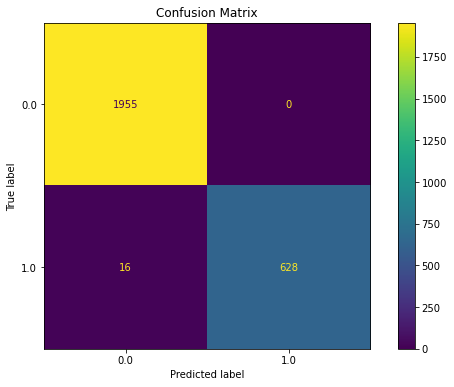

In [49]:
clf = RandomForestClassifier(random_state=1)


param_grid = {
    'max_depth': [8],#list(np.arange(7,9)),
    'min_samples_split': [3],#list(np.arange(1,4)),
    'min_samples_leaf': [1],#list(np.arange(1,3)),
    'max_samples': [0.7],#list(np.arange(0.6,0.85,0.1)),
    #'n_estimators': #list(np.arange(100,1100,100)),   
#    'criterion': ['gini','entropy'],  
    'max_features':[8], 
    'random_state':[1],   
    
}
gridSearch = GridSearchCV(clf, 
                          param_grid, cv=5, n_jobs=-1,)
gridSearch.fit(train_X, train_y)

clf = gridSearch.best_estimator_

print(clf)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')
disp =plot_confusion_matrix(clf, valid_X, valid_y, ax = ax)
disp.confusion_matrix

print(classification_report(valid_y, clf.predict(valid_X)))

C:\Users\Nihal Jayan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingClassifier(learning_rate=0.13, max_depth=6, max_features=10,
                           min_samples_split=9, n_estimators=200,
                           random_state=1, subsample=0.75)
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1955
         1.0       1.00      0.98      0.99       644

    accuracy                           0.99      2599
   macro avg       1.00      0.99      0.99      2599
weighted avg       1.00      0.99      0.99      2599



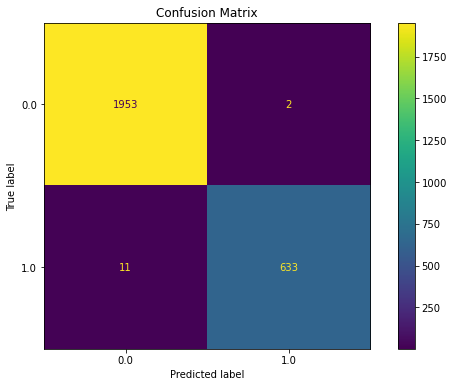

In [50]:
clf = GradientBoostingClassifier()

param_grid = {
    'min_samples_split': [9],#list(np.arange(3,11)), 
    'min_samples_leaf':[1],# list(np.arange(1,2)), 
    'max_depth': [6],#list(np.arange(4,8)), 
    'subsample':[0.75],# list(np.arange(0.5,0.8,0.25)), 
    'max_features':[10],#[9,10,11] , 
    'learning_rate': [0.13],#list(np.arange(0.08,0.22,0.02)), train learning_rate and n_estimatory
    'n_estimators': [200] , 
    'random_state': [1], 
}

gridSearch = GridSearchCV(clf, 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

clf = gridSearch.best_estimator_

print(clf)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')
disp =plot_confusion_matrix(clf, valid_X, valid_y, ax = ax)
disp.confusion_matrix

print(classification_report(valid_y, clf.predict(valid_X)))

C:\Users\Nihal Jayan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=6,
                                                        max_features=10,
                                                        min_samples_leaf=5,
                                                        random_state=1),
                  n_estimators=100, random_state=1)
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1955
         1.0       1.00      0.97      0.98       644

    accuracy                           0.99      2599
   macro avg       0.99      0.98      0.99      2599
weighted avg       0.99      0.99      0.99      2599



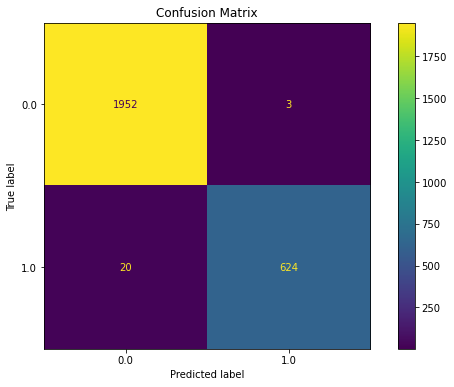

In [51]:
clf = BaggingClassifier(DecisionTreeClassifier(max_depth=6,min_samples_split=2,
                                               min_samples_leaf=5,max_features=10,random_state=1),
                        n_estimators=100, random_state=1)

param_grid = {}
gridSearch = GridSearchCV(clf, 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

clf = gridSearch.best_estimator_

print(clf)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')
disp =plot_confusion_matrix(clf, valid_X, valid_y, ax = ax)
disp.confusion_matrix

print(classification_report(valid_y, clf.predict(valid_X)))

C:\Users\Nihal Jayan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=8,
                                                        max_features=8,
                                                        max_samples=0.7,
                                                        min_samples_split=3,
                                                        random_state=1),
                  n_estimators=100, random_state=1)
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1955
         1.0       1.00      0.97      0.99       644

    accuracy                           0.99      2599
   macro avg       1.00      0.99      0.99      2599
weighted avg       0.99      0.99      0.99      2599



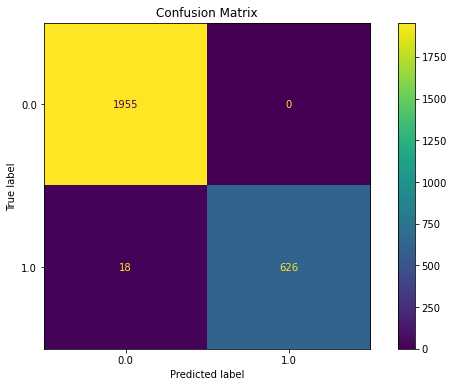

In [52]:
clf = BaggingClassifier(RandomForestClassifier(max_depth=8,min_samples_split=3,
                                               min_samples_leaf=1,max_samples=0.7,
                                               max_features=8,random_state=1), n_estimators=100, random_state=1)

param_grid = {}
gridSearch = GridSearchCV(clf, 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

clf = gridSearch.best_estimator_

print(clf)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')
disp =plot_confusion_matrix(clf, valid_X, valid_y, ax = ax)
disp.confusion_matrix

print(classification_report(valid_y, clf.predict(valid_X)))

C:\Users\Nihal Jayan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


BaggingClassifier(base_estimator=GradientBoostingClassifier(learning_rate=0.13,
                                                            max_depth=6,
                                                            max_features=10,
                                                            min_samples_split=9,
                                                            n_estimators=2000,
                                                            random_state=1,
                                                            subsample=0.75),
                  random_state=1)
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1955
         1.0       1.00      0.98      0.99       644

    accuracy                           1.00      2599
   macro avg       1.00      0.99      0.99      2599
weighted avg       1.00      1.00      1.00      2599



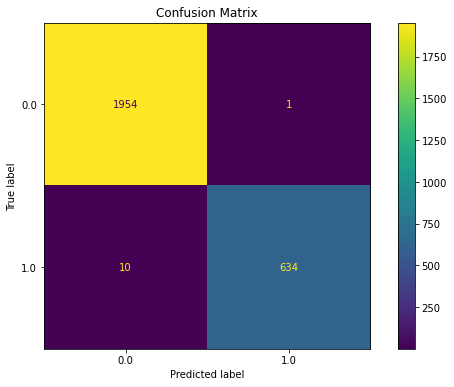

In [53]:
clf = BaggingClassifier(GradientBoostingClassifier(min_samples_split=9,min_samples_leaf=1,
                                                   max_depth=6,subsample=0.75,max_features=10,
                                                   learning_rate=0.13,random_state=1,n_estimators=2000), random_state=1)

param_grid = {}
gridSearch = GridSearchCV(clf, 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

clf = gridSearch.best_estimator_

print(clf)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')
disp =plot_confusion_matrix(clf, valid_X, valid_y, ax = ax)
disp.confusion_matrix

print(classification_report(valid_y, clf.predict(valid_X)))

C:\Users\Nihal Jayan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6,
                                                         max_features=10,
                                                         min_samples_leaf=5,
                                                         random_state=1),
                   n_estimators=100, random_state=1)
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1955
         1.0       1.00      0.98      0.99       644

    accuracy                           0.99      2599
   macro avg       0.99      0.99      0.99      2599
weighted avg       0.99      0.99      0.99      2599



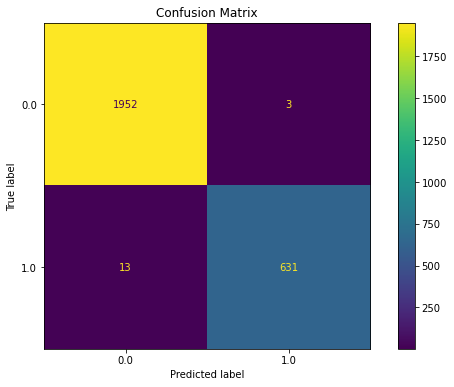

In [54]:
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=6,min_samples_split=2,
                                               min_samples_leaf=5,max_features=10,random_state=1), 
                         n_estimators=100, random_state=1)



param_grid = {}
gridSearch = GridSearchCV(clf, 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

clf = gridSearch.best_estimator_

print(clf)
                        
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')
disp =plot_confusion_matrix(clf, valid_X, valid_y, ax = ax)
disp.confusion_matrix

print(classification_report(valid_y, clf.predict(valid_X)))

C:\Users\Nihal Jayan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=8,
                                                         max_features=8,
                                                         max_samples=0.7,
                                                         min_samples_split=3,
                                                         random_state=1),
                   n_estimators=100, random_state=1)
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1955
         1.0       1.00      0.99      0.99       644

    accuracy                           1.00      2599
   macro avg       1.00      0.99      1.00      2599
weighted avg       1.00      1.00      1.00      2599



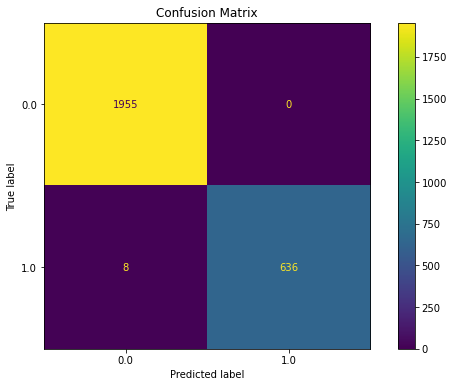

In [55]:
clf = AdaBoostClassifier(RandomForestClassifier(max_depth=8,min_samples_split=3,
                                                min_samples_leaf=1,max_samples=0.7,
                                                max_features=8,random_state=1), n_estimators=100, random_state=1)

param_grid = {}
gridSearch = GridSearchCV(clf, 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

clf = gridSearch.best_estimator_

print(clf)
                        
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')
disp =plot_confusion_matrix(clf, valid_X, valid_y, ax = ax)
disp.confusion_matrix

print(classification_report(valid_y, clf.predict(valid_X)))

C:\Users\Nihal Jayan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoostClassifier(base_estimator=GradientBoostingClassifier(learning_rate=0.13,
                                                             max_depth=6,
                                                             max_features=10,
                                                             min_samples_split=9,
                                                             random_state=1,
                                                             subsample=0.75),
                   n_estimators=2000, random_state=1)
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1955
         1.0       0.99      0.97      0.98       644

    accuracy                           0.99      2599
   macro avg       0.99      0.98      0.99      2599
weighted avg       0.99      0.99      0.99      2599



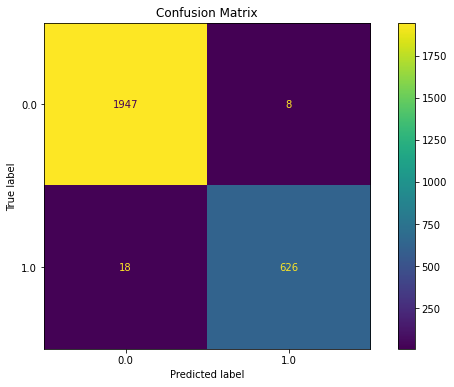

In [56]:
clf = AdaBoostClassifier(GradientBoostingClassifier(min_samples_split=9,min_samples_leaf=1,
                                                    max_depth=6,subsample=0.75,max_features=10,
                                                    learning_rate=0.13,random_state=1), 
                         n_estimators=2000, random_state=1)

param_grid = {}
gridSearch = GridSearchCV(clf, 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

clf = gridSearch.best_estimator_

print(clf)
                        
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')
disp =plot_confusion_matrix(clf, valid_X, valid_y, ax = ax)
disp.confusion_matrix

print(classification_report(valid_y, clf.predict(valid_X)))

C:\Users\Nihal Jayan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


VotingClassifier(estimators=[('decison tree',
                              DecisionTreeClassifier(max_depth=6,
                                                     max_features=10,
                                                     min_samples_leaf=5,
                                                     random_state=1)),
                             ('rf',
                              RandomForestClassifier(max_depth=8,
                                                     max_features=8,
                                                     max_samples=0.7,
                                                     min_samples_split=3,
                                                     random_state=1)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.13,
                                                         max_depth=6,
                                                         max_features=10,
                               

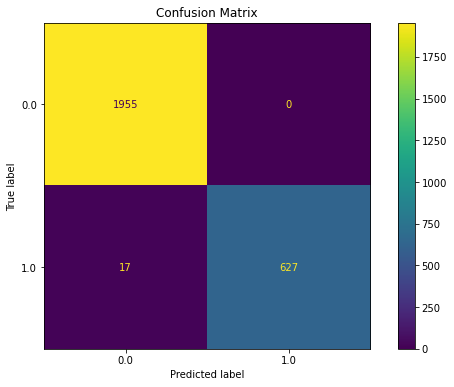

In [57]:
dt = DecisionTreeClassifier(max_depth=6,min_samples_split=2,min_samples_leaf=5,max_features=10,random_state=1)

rf = RandomForestClassifier(max_depth=8,min_samples_split=3,
                            min_samples_leaf=1,max_samples=0.7,max_features=8,random_state=1,)

gb = GradientBoostingClassifier(min_samples_split=9,n_estimators=2000,
                                min_samples_leaf=1,max_depth=6,subsample=0.75,
                                max_features=10,learning_rate=0.13,random_state=1)

ada_gb=AdaBoostClassifier(GradientBoostingClassifier(min_samples_split=9,min_samples_leaf=1,
                                                    max_depth=6,subsample=0.75,max_features=10,
                                                    learning_rate=0.13,random_state=1), 
                         n_estimators=2000, random_state=1)

logit = LogisticRegression(penalty="l2", C=1e12, solver='lbfgs',n_jobs=-1)

clf = VotingClassifier([('decison tree',dt),
                        ('rf',rf),
                        ('gb',gb),
#                        ('logit',logit)
                        ('ada_gb',ada_gb)],
                       voting='hard',  n_jobs=-1)
clf.fit(train_X, train_y)

print(clf)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')
disp =plot_confusion_matrix(clf, valid_X, valid_y, ax = ax)
disp.confusion_matrix

print(classification_report(valid_y, clf.predict(valid_X)))

C:\Users\Nihal Jayan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(max_depth=6,
                                                     max_features=10,
                                                     min_samples_leaf=5,
                                                     random_state=1)),
                             ('rf',
                              RandomForestClassifier(max_depth=8,
                                                     max_features=8,
                                                     max_samples=0.7,
                                                     min_samples_split=3,
                                                     random_state=1)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.13,
                                                         max_depth=6,
                                                         max_features=10,
                                         

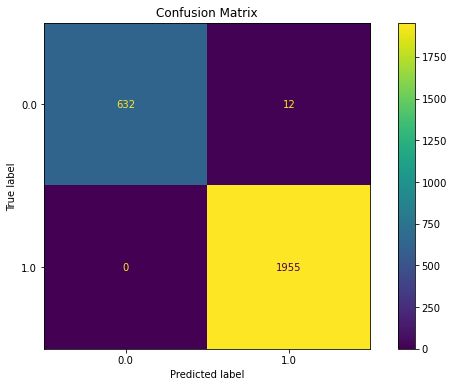

In [69]:
dt = DecisionTreeClassifier(max_depth=6,min_samples_split=2,min_samples_leaf=5,max_features=10,random_state=1)

rf = RandomForestClassifier(max_depth=8,min_samples_split=3,
                            min_samples_leaf=1,max_samples=0.7,max_features=8,random_state=1,)

gb = GradientBoostingClassifier(min_samples_split=9,
                                min_samples_leaf=1,max_depth=6,subsample=0.75,
                                max_features=10,learning_rate=0.13,random_state=1)

ada_gb=AdaBoostClassifier(GradientBoostingClassifier(min_samples_split=9,min_samples_leaf=1,
                                                    max_depth=6,subsample=0.75,max_features=10,
                                                    learning_rate=0.13,random_state=1), 
                         n_estimators=100, random_state=1)

logit = LogisticRegression(penalty="l2", C=1e12, solver='lbfgs',n_jobs=-1)

clf = VotingClassifier([('dt',dt),
                        ('rf',rf),
                        ('gb',gb),
#                        'logit',logit)
                        ('ada_gb',ada_gb)],
                       voting='soft',  n_jobs=-1)
clf.fit(train_X, train_y)

print(clf)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')
disp =plot_confusion_matrix(clf, valid_X, valid_y, ax = ax)
disp.confusion_matrix

print(classification_report(valid_y, clf.predict(valid_X)))


In [58]:
predictors = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
              'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
              'pH', 'sulphates', 'alcohol', 'quality', 'free sulfur dioxide_miss',
              'density_miss', 'sulphates_miss', 'alcohol_miss']
target = ['Red']
X = df[predictors]
y = df[target]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.40, random_state=3)

DecisionTreeClassifier(max_depth=9, max_features=11, min_samples_split=7,
                       random_state=1)
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98       644
         1.0       0.99      1.00      0.99      1955

    accuracy                           0.99      2599
   macro avg       0.99      0.98      0.98      2599
weighted avg       0.99      0.99      0.99      2599



C:\Users\Nihal Jayan\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.91482966 0.91482966 ... 0.97614265 0.97614265 0.97614265]
  warnings.warn(


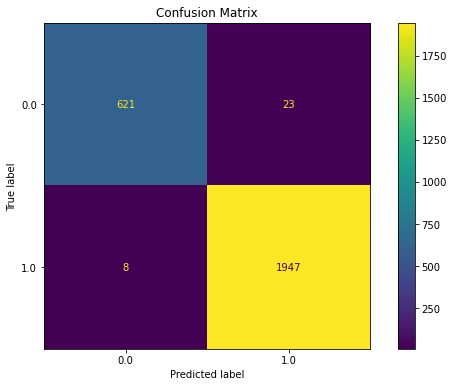

In [59]:
clf = DecisionTreeClassifier(random_state=1)

param_grid = {
    'max_depth': list(np.arange(1,12)),    
    'min_samples_split': list(np.arange(1,12)), 
    'min_samples_leaf':  list(np.arange(1,12)) ,#
#    'min_impurity_decrease': list(np.arange(0.0,0.015,0.001)), #
    'max_features': [7,8,9,10,11,12],    #
}
gridSearch = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

clf = gridSearch.best_estimator_
print(clf)                  


fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')
disp =plot_confusion_matrix(clf, valid_X, valid_y, ax = ax)
disp.confusion_matrix

print(classification_report(valid_y, clf.predict(valid_X)))

C:\Users\Nihal Jayan\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomForestClassifier(max_depth=8, max_features=8, max_samples=0.7,
                       min_samples_split=3, random_state=1)
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       644
         1.0       0.99      1.00      1.00      1955

    accuracy                           0.99      2599
   macro avg       1.00      0.99      0.99      2599
weighted avg       0.99      0.99      0.99      2599



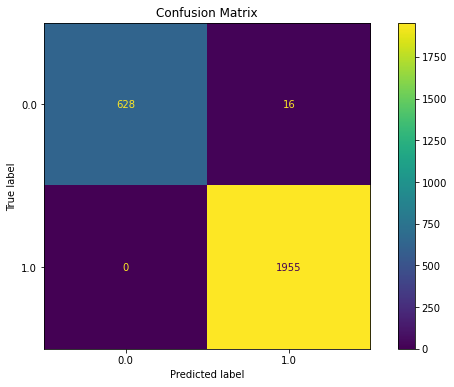

In [60]:
clf = RandomForestClassifier(random_state=1)


param_grid = {
    'max_depth': [8],#list(np.arange(7,9)),
    'min_samples_split': [3],#list(np.arange(1,4)),
    'min_samples_leaf': [1],#list(np.arange(1,3)),
    'max_samples': [0.7],#list(np.arange(0.6,0.85,0.1)),
    #'n_estimators': #list(np.arange(100,1100,100)),   
#    'criterion': ['gini','entropy'],  
    'max_features':[8], 
    'random_state':[1],   
    
}
gridSearch = GridSearchCV(clf, 
                          param_grid, cv=5, n_jobs=-1,)
gridSearch.fit(train_X, train_y)

clf = gridSearch.best_estimator_

print(clf)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')
disp =plot_confusion_matrix(clf, valid_X, valid_y, ax = ax)
disp.confusion_matrix

print(classification_report(valid_y, clf.predict(valid_X)))

C:\Users\Nihal Jayan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingClassifier(learning_rate=0.13, max_depth=6, max_features=10,
                           min_samples_split=9, n_estimators=200,
                           random_state=1, subsample=0.75)
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       644
         1.0       0.99      1.00      1.00      1955

    accuracy                           1.00      2599
   macro avg       1.00      0.99      0.99      2599
weighted avg       1.00      1.00      1.00      2599



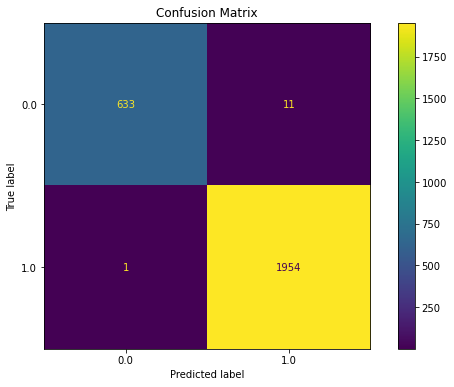

In [61]:
clf = GradientBoostingClassifier()

param_grid = {
    'min_samples_split': [9],#list(np.arange(3,11)), 
    'min_samples_leaf':[1],# list(np.arange(1,2)), 
    'max_depth': [6],#list(np.arange(4,8)), 
    'subsample':[0.75],# list(np.arange(0.5,0.8,0.25)), 
    'max_features':[10],#[9,10,11] , 
    'learning_rate': [0.13],#list(np.arange(0.08,0.22,0.02)), train learning_rate and n_estimatory
    'n_estimators': [200] , 
    'random_state': [1], 
}

gridSearch = GridSearchCV(clf, 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

clf = gridSearch.best_estimator_

print(clf)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')
disp =plot_confusion_matrix(clf, valid_X, valid_y, ax = ax)
disp.confusion_matrix

print(classification_report(valid_y, clf.predict(valid_X)))

C:\Users\Nihal Jayan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=6,
                                                        max_features=10,
                                                        min_samples_leaf=5,
                                                        random_state=1),
                  n_estimators=100, random_state=1)
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       644
         1.0       0.99      1.00      0.99      1955

    accuracy                           0.99      2599
   macro avg       0.99      0.98      0.99      2599
weighted avg       0.99      0.99      0.99      2599



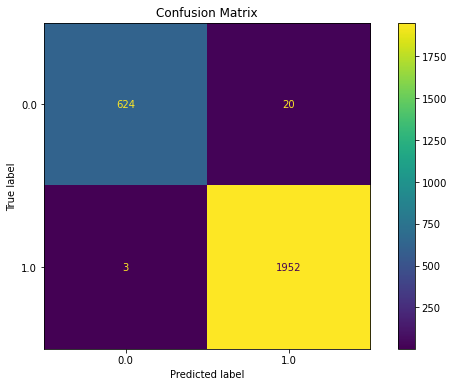

In [62]:
clf = BaggingClassifier(DecisionTreeClassifier(max_depth=6,min_samples_split=2,
                                               min_samples_leaf=5,max_features=10,random_state=1),
                        n_estimators=100, random_state=1)

param_grid = {}
gridSearch = GridSearchCV(clf, 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

clf = gridSearch.best_estimator_

print(clf)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')
disp =plot_confusion_matrix(clf, valid_X, valid_y, ax = ax)
disp.confusion_matrix

print(classification_report(valid_y, clf.predict(valid_X)))

C:\Users\Nihal Jayan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=8,
                                                        max_features=8,
                                                        max_samples=0.7,
                                                        min_samples_split=3,
                                                        random_state=1),
                  n_estimators=100, random_state=1)
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       644
         1.0       0.99      1.00      1.00      1955

    accuracy                           0.99      2599
   macro avg       1.00      0.99      0.99      2599
weighted avg       0.99      0.99      0.99      2599



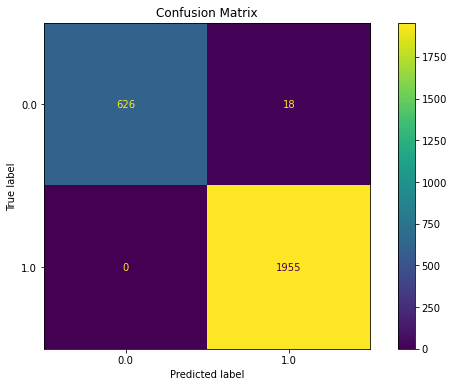

In [63]:
clf = BaggingClassifier(RandomForestClassifier(max_depth=8,min_samples_split=3,
                                               min_samples_leaf=1,max_samples=0.7,
                                               max_features=8,random_state=1), n_estimators=100, random_state=1)

param_grid = {}
gridSearch = GridSearchCV(clf, 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

clf = gridSearch.best_estimator_

print(clf)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')
disp =plot_confusion_matrix(clf, valid_X, valid_y, ax = ax)
disp.confusion_matrix

print(classification_report(valid_y, clf.predict(valid_X)))

C:\Users\Nihal Jayan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


BaggingClassifier(base_estimator=GradientBoostingClassifier(learning_rate=0.13,
                                                            max_depth=6,
                                                            max_features=10,
                                                            min_samples_split=9,
                                                            n_estimators=2000,
                                                            random_state=1,
                                                            subsample=0.75),
                  random_state=1)
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       644
         1.0       1.00      1.00      1.00      1955

    accuracy                           1.00      2599
   macro avg       1.00      0.99      0.99      2599
weighted avg       1.00      1.00      1.00      2599



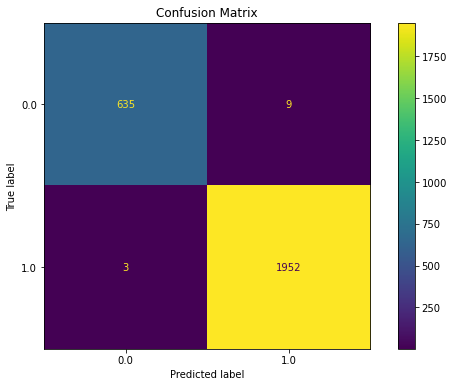

In [64]:
clf = BaggingClassifier(GradientBoostingClassifier(min_samples_split=9,min_samples_leaf=1,
                                                   max_depth=6,subsample=0.75,max_features=10,
                                                   learning_rate=0.13,random_state=1,n_estimators=2000), random_state=1)

param_grid = {}
gridSearch = GridSearchCV(clf, 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

clf = gridSearch.best_estimator_

print(clf)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')
disp =plot_confusion_matrix(clf, valid_X, valid_y, ax = ax)
disp.confusion_matrix

print(classification_report(valid_y, clf.predict(valid_X)))

C:\Users\Nihal Jayan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6,
                                                         max_features=10,
                                                         min_samples_leaf=5,
                                                         random_state=1),
                   n_estimators=100, random_state=1)
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       644
         1.0       0.99      1.00      1.00      1955

    accuracy                           0.99      2599
   macro avg       0.99      0.99      0.99      2599
weighted avg       0.99      0.99      0.99      2599



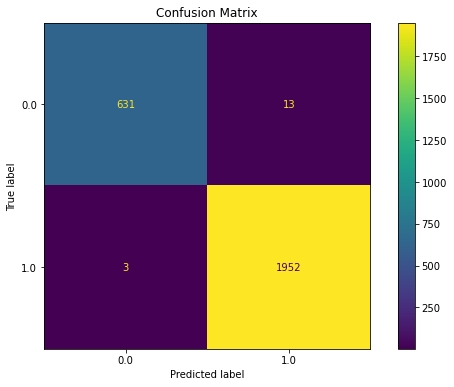

In [65]:
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=6,min_samples_split=2,
                                               min_samples_leaf=5,max_features=10,random_state=1), 
                         n_estimators=100, random_state=1)



param_grid = {}
gridSearch = GridSearchCV(clf, 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

clf = gridSearch.best_estimator_

print(clf)
                        
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')
disp =plot_confusion_matrix(clf, valid_X, valid_y, ax = ax)
disp.confusion_matrix

print(classification_report(valid_y, clf.predict(valid_X)))

C:\Users\Nihal Jayan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=8,
                                                         max_features=8,
                                                         max_samples=0.7,
                                                         min_samples_split=3,
                                                         random_state=1),
                   n_estimators=100, random_state=1)
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       644
         1.0       1.00      1.00      1.00      1955

    accuracy                           1.00      2599
   macro avg       1.00      0.99      1.00      2599
weighted avg       1.00      1.00      1.00      2599



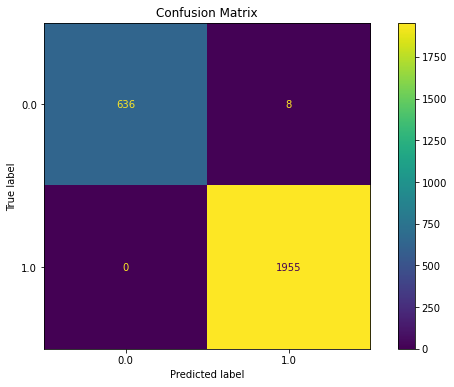

In [66]:
clf = AdaBoostClassifier(RandomForestClassifier(max_depth=8,min_samples_split=3,
                                                min_samples_leaf=1,max_samples=0.7,
                                                max_features=8,random_state=1), n_estimators=100, random_state=1)

param_grid = {}
gridSearch = GridSearchCV(clf, 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

clf = gridSearch.best_estimator_

print(clf)
                        
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')
disp =plot_confusion_matrix(clf, valid_X, valid_y, ax = ax)
disp.confusion_matrix

print(classification_report(valid_y, clf.predict(valid_X)))

C:\Users\Nihal Jayan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoostClassifier(base_estimator=GradientBoostingClassifier(learning_rate=0.13,
                                                             max_depth=6,
                                                             max_features=10,
                                                             min_samples_split=9,
                                                             random_state=1,
                                                             subsample=0.75),
                   n_estimators=2000, random_state=1)
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       644
         1.0       0.99      1.00      0.99      1955

    accuracy                           0.99      2599
   macro avg       0.99      0.98      0.99      2599
weighted avg       0.99      0.99      0.99      2599



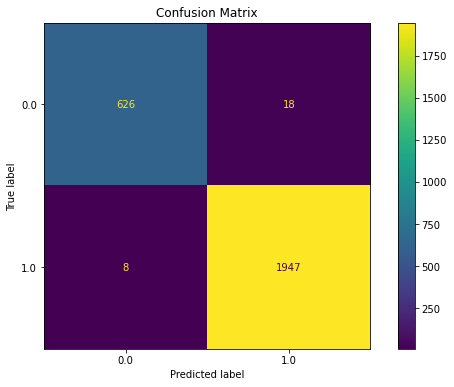

In [67]:
clf = AdaBoostClassifier(GradientBoostingClassifier(min_samples_split=9,min_samples_leaf=1,
                                                    max_depth=6,subsample=0.75,max_features=10,
                                                    learning_rate=0.13,random_state=1), 
                         n_estimators=2000, random_state=1)

param_grid = {}
gridSearch = GridSearchCV(clf, 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

clf = gridSearch.best_estimator_

print(clf)
                        
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')
disp =plot_confusion_matrix(clf, valid_X, valid_y, ax = ax)
disp.confusion_matrix

print(classification_report(valid_y, clf.predict(valid_X)))

C:\Users\Nihal Jayan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


VotingClassifier(estimators=[('decison tree',
                              DecisionTreeClassifier(max_depth=6,
                                                     max_features=10,
                                                     min_samples_leaf=5,
                                                     random_state=1)),
                             ('rf',
                              RandomForestClassifier(max_depth=8,
                                                     max_features=8,
                                                     max_samples=0.7,
                                                     min_samples_split=3,
                                                     random_state=1)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.13,
                                                         max_depth=6,
                                                         max_features=10,
                               

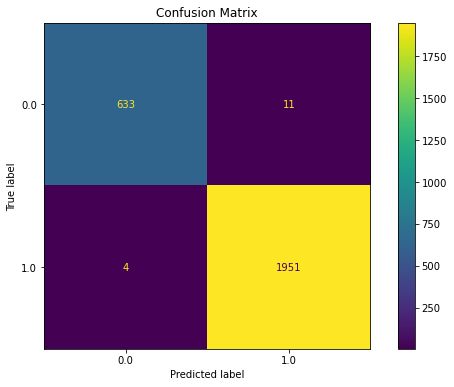

In [68]:
dt = DecisionTreeClassifier(max_depth=6,min_samples_split=2,min_samples_leaf=5,max_features=10,random_state=1)

rf = RandomForestClassifier(max_depth=8,min_samples_split=3,
                            min_samples_leaf=1,max_samples=0.7,max_features=8,random_state=1,)

gb = GradientBoostingClassifier(min_samples_split=9,n_estimators=2000,
                                min_samples_leaf=1,max_depth=6,subsample=0.75,
                                max_features=10,learning_rate=0.13,random_state=1)

ada_gb=AdaBoostClassifier(GradientBoostingClassifier(min_samples_split=9,min_samples_leaf=1,
                                                    max_depth=6,subsample=0.75,max_features=10,
                                                    learning_rate=0.13,random_state=1), 
                         n_estimators=2000, random_state=1)

logit = LogisticRegression(penalty="l2", C=1e12, solver='lbfgs',n_jobs=-1)

clf = VotingClassifier([('decison tree',dt),
                        ('rf',rf),
                        ('gb',gb),
#                        ('logit',logit)
                        ('ada_gb',ada_gb)],
                       voting='hard',  n_jobs=-1)
clf.fit(train_X, train_y)

print(clf)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')
disp =plot_confusion_matrix(clf, valid_X, valid_y, ax = ax)
disp.confusion_matrix

print(classification_report(valid_y, clf.predict(valid_X)))

C:\Users\Nihal Jayan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(max_depth=6,
                                                     max_features=10,
                                                     min_samples_leaf=5,
                                                     random_state=1)),
                             ('rf',
                              RandomForestClassifier(max_depth=8,
                                                     max_features=8,
                                                     max_samples=0.7,
                                                     min_samples_split=3,
                                                     random_state=1)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.13,
                                                         max_depth=6,
                                                         max_features=10,
                                         

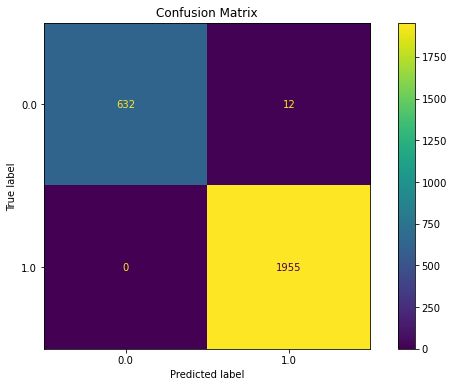

In [70]:
dt = DecisionTreeClassifier(max_depth=6,min_samples_split=2,min_samples_leaf=5,max_features=10,random_state=1)

rf = RandomForestClassifier(max_depth=8,min_samples_split=3,
                            min_samples_leaf=1,max_samples=0.7,max_features=8,random_state=1,)

gb = GradientBoostingClassifier(min_samples_split=9,
                                min_samples_leaf=1,max_depth=6,subsample=0.75,
                                max_features=10,learning_rate=0.13,random_state=1)

ada_gb=AdaBoostClassifier(GradientBoostingClassifier(min_samples_split=9,min_samples_leaf=1,
                                                    max_depth=6,subsample=0.75,max_features=10,
                                                    learning_rate=0.13,random_state=1), 
                         n_estimators=100, random_state=1)

logit = LogisticRegression(penalty="l2", C=1e12, solver='lbfgs',n_jobs=-1)

clf = VotingClassifier([('dt',dt),
                        ('rf',rf),
                        ('gb',gb),
#                        'logit',logit)
                        ('ada_gb',ada_gb)],
                       voting='soft',  n_jobs=-1)
clf.fit(train_X, train_y)

print(clf)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')
disp =plot_confusion_matrix(clf, valid_X, valid_y, ax = ax)
disp.confusion_matrix

print(classification_report(valid_y, clf.predict(valid_X)))

In [71]:
predictors = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
              'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
              'pH', 'sulphates', 'alcohol', 'quality', 'free sulfur dioxide_miss',
              'density_miss', 'sulphates_miss', 'alcohol_miss']
outcome = ['Red']

In [78]:
from sklearn.decomposition import PCA  #principal components Analysis
from sklearn.impute import KNNImputer   # missing values imputation
from pandas.plotting import scatter_matrix  #scatter matrix correlation , scatter

from sklearn.cluster import KMeans  # clustering
from sklearn.metrics import silhouette_score #evaluation metric for # of clusters
from sklearn.metrics import mean_absolute_error  #MAE/MAD
from sklearn.neighbors import KNeighborsRegressor  #classification algorithm
import matplotlib.pylab as plt 
from sklearn.metrics import mean_squared_error

In [79]:
X = df[predictors]
y = df[outcome]

In [80]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [81]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(train_X)

train_X=pd.DataFrame(scaler.transform(train_X), columns=train_X.columns)
valid_X=pd.DataFrame(scaler.transform(valid_X), columns=valid_X.columns)

<AxesSubplot:xlabel='k'>

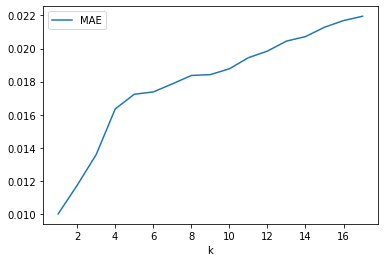

In [82]:
results = []
for k in range(1, 18):  
        knn = KNeighborsRegressor(n_neighbors=k,n_jobs=-1).fit(train_X, train_y) #model 
        results.append({
            'k': k,
            'MAE': mean_absolute_error(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
results.sort_values(by='MAE')
results.index=results.k
results=results.drop('k',axis=1)
results.plot()

<AxesSubplot:xlabel='k_distance'>

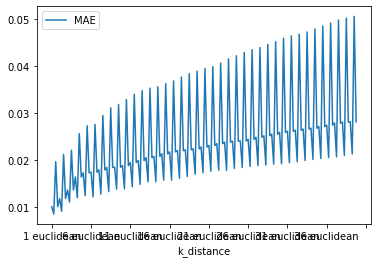

In [83]:
metric_list=['euclidean','manhattan','chebyshev','minkowski',]
             
results = []
for k in range(1, 40):
    for m in metric_list:
        knn = KNeighborsRegressor(n_neighbors=k,metric=m,n_jobs=-1).fit(train_X, train_y)
        results.append({
            'k_distance': str(k)+" "+str(m),
            'MAE': mean_absolute_error(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
results.sort_values(by='MAE')
results.index=results.k_distance
results=results.drop('k_distance',axis=1)
results.plot()

In [84]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = k)
classifier.fit(train_X, train_y)

C:\Users\Nihal Jayan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=39)

In [85]:
y_pred = classifier.predict(valid_X)

In [86]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(valid_y, y_pred))
print(classification_report(valid_y, y_pred))

[[ 629   14]
 [  21 1935]]
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       643
         1.0       0.99      0.99      0.99      1956

    accuracy                           0.99      2599
   macro avg       0.98      0.98      0.98      2599
weighted avg       0.99      0.99      0.99      2599



In [111]:
predictors = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
              'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
              'pH', 'sulphates', 'alcohol', 'quality', 'free sulfur dioxide_miss',
              'density_miss', 'sulphates_miss', 'alcohol_miss']
outcome = ['White']

In [112]:
X = df[predictors]
y = df[outcome]

In [113]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(train_X)

train_X=pd.DataFrame(scaler.transform(train_X), columns=train_X.columns)
valid_X=pd.DataFrame(scaler.transform(valid_X), columns=valid_X.columns)

<AxesSubplot:xlabel='k'>

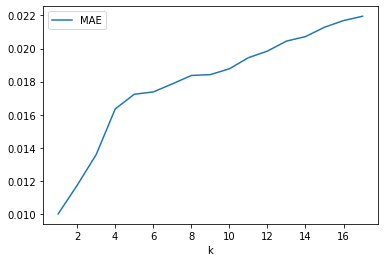

In [114]:
results = []
for k in range(1, 18):  
        knn = KNeighborsRegressor(n_neighbors=k,n_jobs=-1).fit(train_X, train_y) #model 
        results.append({
            'k': k,
            'MAE': mean_absolute_error(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
results.sort_values(by='MAE')
results.index=results.k
results=results.drop('k',axis=1)
results.plot()

<AxesSubplot:xlabel='k_distance'>

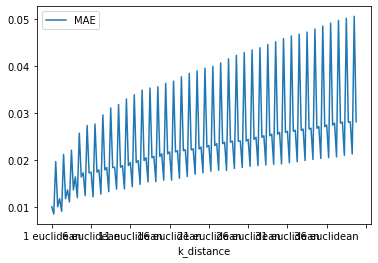

In [115]:
metric_list=['euclidean','manhattan','chebyshev','minkowski',]
             
results = []
for k in range(1, 40):
    for m in metric_list:
        knn = KNeighborsRegressor(n_neighbors=k,metric=m,n_jobs=-1).fit(train_X, train_y)
        results.append({
            'k_distance': str(k)+" "+str(m),
            'MAE': mean_absolute_error(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
results.sort_values(by='MAE')
results.index=results.k_distance
results=results.drop('k_distance',axis=1)
results.plot()

In [116]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = k)
classifier.fit(train_X, train_y)

C:\Users\Nihal Jayan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=39)

In [117]:
y_pred = classifier.predict(valid_X)

In [118]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(valid_y, y_pred))
print(classification_report(valid_y, y_pred))

[[ 629   14]
 [  21 1935]]
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       643
         1.0       0.99      0.99      0.99      1956

    accuracy                           0.99      2599
   macro avg       0.98      0.98      0.98      2599
weighted avg       0.99      0.99      0.99      2599



In [92]:
from sklearn.naive_bayes import MultinomialNB 

In [94]:
model = MultinomialNB(alpha=0.01)

model.fit(train_X, train_y)

C:\Users\Nihal Jayan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MultinomialNB(alpha=0.01)

In [95]:
predProb_train = model.predict_proba(train_X) #training data
predProb_valid = model.predict_proba(valid_X)  #validation data

# predict class membership
y_valid_pred = model.predict(valid_X)
y_train_pred = model.predict(train_X)

In [96]:
pd.DataFrame(predProb_valid)

,0,1
0,0.170187,0.829813
1,0.239343,0.760657
2,0.309015,0.690985
3,0.180057,0.819943
4,0.156684,0.843316
...,...,...
2594,0.216149,0.783851
2595,0.174986,0.825014
2596,0.150128,0.849872
2597,0.270514,0.729486


In [97]:
model.classes_

array([0., 1.])

In [98]:
#Desired cutoff value
Cutoff=0.5

#create dataframe
df_valid=pd.DataFrame()

#categorical outcome variable
df_valid['class']=valid_y

#positive prediction probabiltiy proba_
df_valid['proba']=predProb_valid[:,0]

df_valid['y_true']=[1 if p == "delayed" else 0 for p in df_valid['class']]

#predicted class y_pred
df_valid['y_pred']=[1 if p > Cutoff else 0 for p in df_valid.proba]

In [99]:
df_valid

,class,proba,y_true,y_pred
3772,1.0,0.170187,0,0
6009,1.0,0.239343,0,0
3464,0.0,0.309015,0,0
1518,1.0,0.180057,0,0
3761,1.0,0.156684,0,0
...,...,...,...,...
2947,1.0,0.216149,0,0
5755,1.0,0.174986,0,0
5966,1.0,0.150128,0,0
3773,0.0,0.270514,0,0


In [100]:
df_valid['class'].value_counts()

1.0    1956
0.0     643
Name: class, dtype: int64

In [101]:
cm=confusion_matrix(df_valid['y_true'],df_valid['y_pred'])
cm

array([[2598,    1],
       [   0,    0]], dtype=int64)

In [102]:
true_positive=cm[1][1]
print("true positive: "+str(true_positive))

false_positive=cm[0][1]
print('false positive: '+str(false_positive))

false_negative=cm[1][0]
print('false negative: '+str(false_negative))

true_negative=cm[0][0]
print('true negative: '+str(true_negative))

true positive: 0
false positive: 1
false negative: 0
true negative: 2598


In [103]:
print(accuracy_score(df_valid['y_true'],df_valid['y_pred']))

print((true_positive+true_negative)/df_valid['class'].count())

0.9996152366294728
0.9996152366294728


In [104]:
print(precision_score(df_valid['y_true'],df_valid['y_pred']))

print(true_positive / (true_positive + false_positive))

0.0
0.0


C:\Users\Nihal Jayan\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


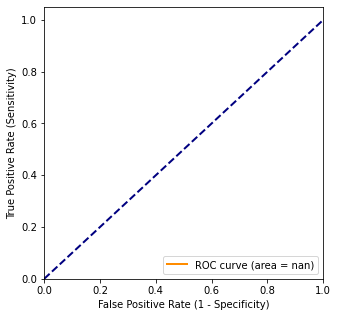

In [106]:
fpr, tpr, _ = roc_curve(df_valid.y_true, df_valid.proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[5, 5])
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()


array([[   1,  642],
       [   0, 1956]], dtype=int64)

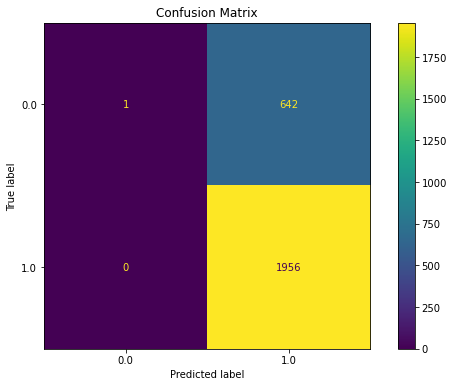

In [107]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')
disp =plot_confusion_matrix(model, valid_X, valid_y, ax = ax)
disp.confusion_matrix

In [ ]:
# Gradient Boosting Classifier seems to be the most efficient model in terms of accuracy and execution time.